In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

In [ ]:
start = '2010-01-01'
end = '2023-12-20'


company = 'AAPL'

df = yfinance.download(company, start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200
2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100


In [ ]:
df = df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


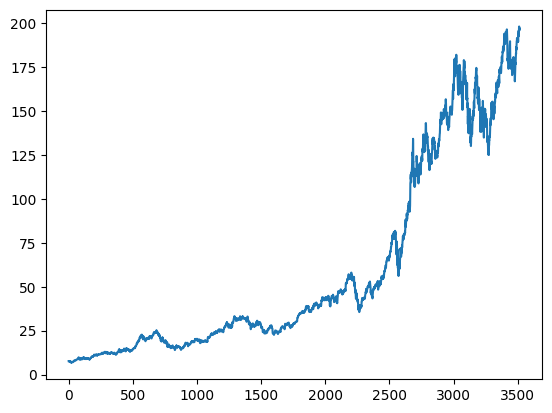

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3510,195.089996,198.000000,194.850006,197.960007,70404200
3511,198.020004,199.619995,196.160004,198.110001,66831600
3512,197.529999,198.399994,197.000000,197.570007,128256700
3513,196.089996,196.630005,194.389999,195.889999,55751900


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3510    181.670201
3511    181.715101
3512    181.745801
3513    181.772501
3514    181.783601
Name: Close, Length: 3515, dtype: float64

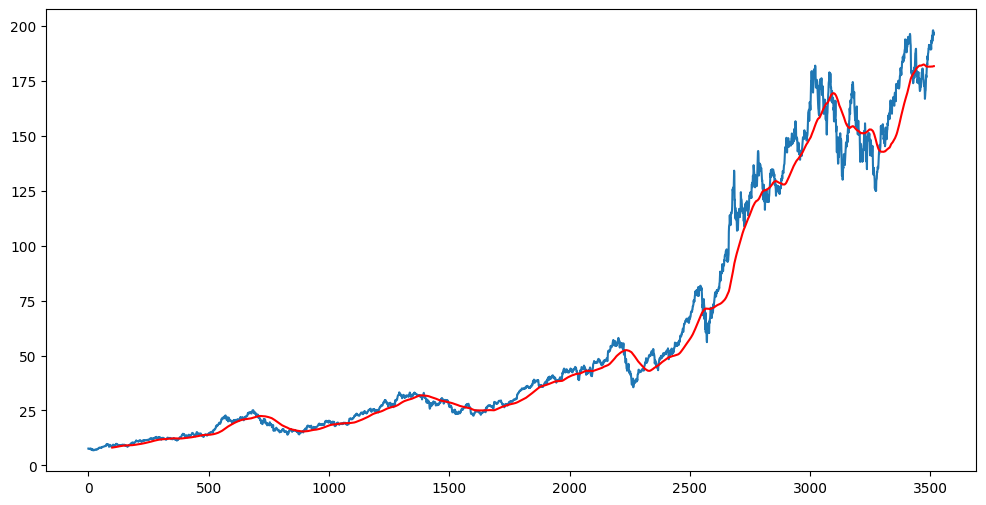

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3510    177.04670
3511    177.31070
3512    177.56900
3513    177.79330
3514    178.00885
Name: Close, Length: 3515, dtype: float64

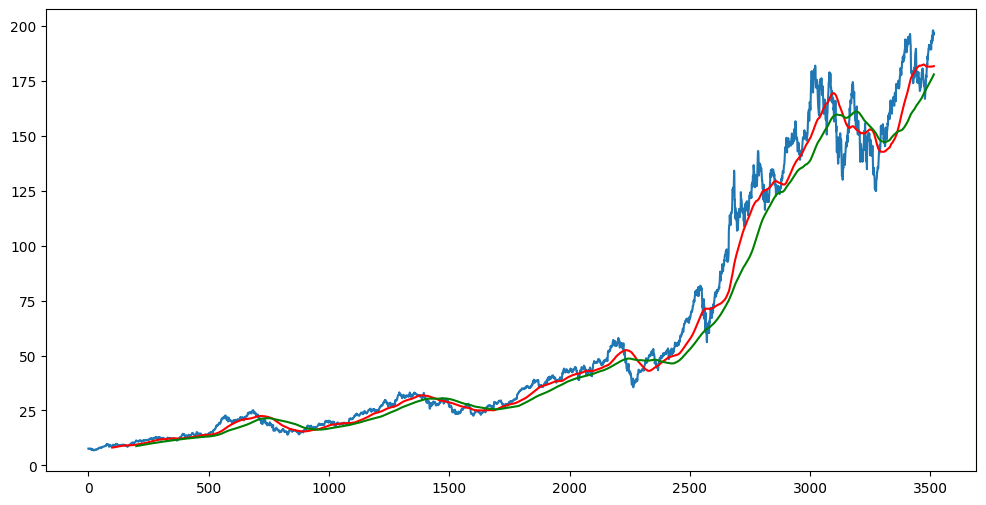

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(3515, 5)

In [ ]:
# Spliting data ito train and test

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(2460, 1)
(1055, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499
2464,58.820000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.96251844],
       [0.97537065],
       [0.99032415]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train) , np.array(y_train)

In [ ]:
# ML model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation ='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation ='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 29s 291ms/step - loss: 0.0340
Epoch 2/50
74/74 [==============================] - 24s 324ms/step - loss: 0.0081
Epoch 3/50
74/74 [==============================] - 26s 356ms/step - loss: 0.0069
Epoch 4/50
74/74 [==============================] - 21s 285ms/step - loss: 0.0063
Epoch 5/50
74/74 [==============================] - 23s 316ms/step - loss: 0.0060
Epoch 6/50
74/74 [==============================] - 22s 294ms/step - loss: 0.0056
Epoch 7/50
74/74 [==============================] - 23s 304ms/step - loss: 0.0052
Epoch 8/50
74/74 [==============================] - 23s 312ms/step - loss: 0.0045
Epoch 9/50
74/74 [==============================] - 21s 288ms/step - loss: 0.0045
Epoch 10/50
74/74 [==============================] - 23s 311ms/step - loss: 0.0042
Epoch 11/50
74/74 [==============================] - 22s 303ms/step - loss: 0.0038
Epoch 12/50
74/74 [==============================] - 23s 303ms/step - loss: 0.0041
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499
2464,58.820000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-44-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [ ]:
final_df.head()

,Close
0,46.650002
1,45.695000
2,44.915001
3,44.742500
4,44.557499


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02148141],
       [0.01531155],
       [0.01027231],
       ...,
       [0.99651133],
       [0.98565752],
       [0.99244114]])

In [ ]:
input_data.shape

(1155, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1055, 100, 1)
(1055,)


In [ ]:
# Make Predictions

y_predicted = model.predict(x_test)

33/33 [==============================] - 5s 124ms/step


In [ ]:
y_predicted.shape

(1055, 1)

In [ ]:
y_test

array([0.10160869, 0.10105952, 0.10017121, ..., 0.99651133, 0.98565752,
       0.99244114])

In [ ]:
y_predicted

array([[0.13320985],
       [0.13399014],
       [0.13490611],
       ...,
       [0.9305382 ],
       [0.9355005 ],
       [0.93995166]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00646057])

In [ ]:
scale_factor = 1/0.00646057
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


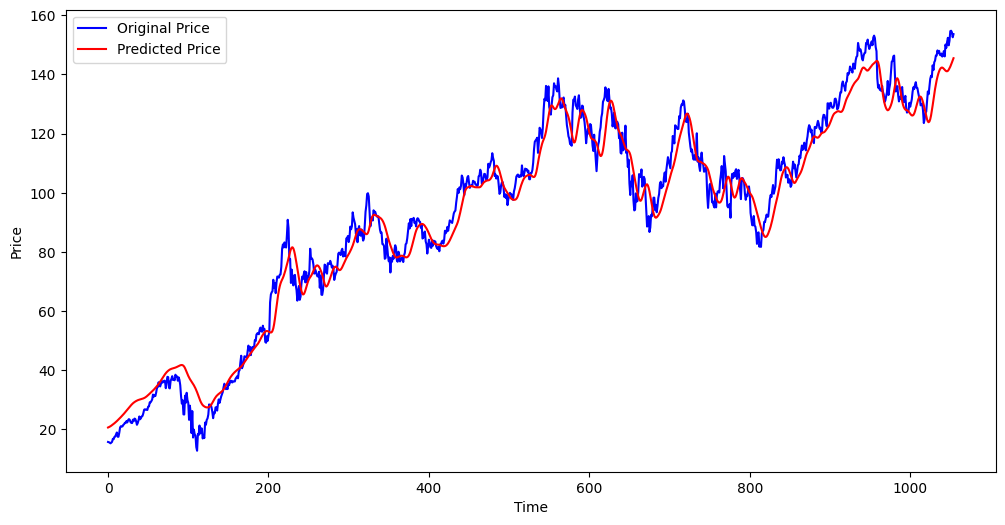

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()